
<H1 style="text-align:center;">SIR model of infection</H1>
<BODY>
<H2>Project description:</H2>
<div>
    <p1>
    The project focuses on modeling the spread of infection. It is based on so called SIR model of infection, which stands for Suspectible, Infected, Recovered. It is a compartment model, which means that is splits population into three compartments - S, I and R. When an infected individual comes into contact with suspectible, suspectible can become infected for certain amount of time, after which he moves to recovered compartment and becomes immune. Graphical summarization is presented below:
    </p1>
</div>

<p style="text-align:center;"><img src="SIRFlow.png "></p>

<H2>Project content:</H2>
<div>
    <p1>
        SIR model of infection is a viable tool to analyse the risk of potential pandemic outbreak, which can help with prevention.
        Data comes from the R outbreaks package, it contains data about the outbreak of influenza H1N1 in a boarding school in england in 1978. Dataset consists of the total population of school and for each of 15 days, the number of currently sick and recovered students is provided.
        The selected dataset is suitable for SIR analysis and didn't require any preprocessing, it was extracted from R package with the use of pyreadr library, converted to pandas dataframe and exported to csv format.
    </p1>
</div>
<h2>Models:</h2>
<p style="text-align:center;"><img src="diffeq.png "></p>

<div>
<p>We specified two different models for predicting the infection:</p>
<ul>
  <li>Model 1:
    <ul>
      <li>simplified version of classical SIR model, for simplification we removed the I/N term, which made the infection chance independent on the percentage of sick people in population (chance of becoming infected depends only on beta parameter). The goal of simplification is to see how big of an impact the I/N has on the model accuracy</li>
    </ul>
  </li>
  <li>Model 2:
    <ul>
      <li>classical SIR model, with the infection flow specified as in figure above.</li>
    </ul>
  </li>
 
</ul>
</div>
</BODY>

<p1>Data used in the models consists of:</p1>
<ul>
      <li>Amount of days of the infection (number of samples)</li>
      <li>classical SIR model, with the infection flow specified as in figure above.</li> 
      <li>Vector of days of the infection</li>
      <li>Initial values of suspectible, infected and recovered people</li>
      <li>For the fitted models, observed data, so the number of sick people for each given day</li>
</ul>

In [85]:
from cmdstanpy import CmdStanModel
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pyreadr
import arviz as az


In [86]:
data = pd.read_csv('H1N1.csv')

In [87]:
in_bed = data['in_bed']
in_bed

0       3
1       8
2      26
3      76
4     225
5     298
6     258
7     233
8     189
9     128
10     68
11     29
12     14
13      4
Name: in_bed, dtype: int64

In [88]:
cases = in_bed
N = 763
n_days = len(cases)
t = range(1,15)
t0 = 0
i0 = 1
s0 = N-i0
r0 = 0
S = s0
I = i0
R = r0
y0 = (s0, i0 ,r0)
ts = t

In [89]:
n_days

14

## Prior (Model 1)



Parameters for priors were selected using online sources (different SIR models) and the values were adjusted with trials and errors method

In [90]:
model1 = CmdStanModel(stan_file='simplified_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [91]:
model1 = CmdStanModel(stan_file='simplified_ppc.stan')
sim1 = model1.sample( data = {'n_days':n_days, 'y0':y0, 't0':t0, 'ts':ts, 'N':N}, 
                        iter_sampling = 1000,
                        iter_warmup= 0,
                        fixed_param= True,
                            chains = 4,
                            seed = 31052022,
                            )

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▊         | 00:00 Status



chain 1 |██▌       | 00:00 Iteration: 100 / 1000 [ 10%]  (Sampling)


chain 1 |█████     | 00:00 Iteration: 400 / 1000 [ 40%]  (Sampling)


chain 1 |██████▋   | 00:00 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████████▎ | 00:00 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                      
chain 2 |██████████| 00:00 Sampling completed                      
chain 3 |██████████| 00:00 Sampling completed                      
chain 4 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [92]:
sim1.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.00,NaN,0.00,0.0,0.0000,0.00,NaN,NaN,NaN
beta,0.41,0.0058,0.37,0.0,0.4100,1.00,4100.0,1500.0,1.0
gamma,0.27,0.0046,0.29,0.0,0.1800,0.84,4000.0,1400.0,1.0
phi_inv,0.13,0.0030,0.19,0.0,0.0550,0.53,4000.0,1400.0,1.0
"y[1,1]",284.00,3.6000,224.00,0.0,339.0000,627.00,3974.0,1427.0,1.0
"y[1,2]",181.00,2.4000,154.00,0.0,206.0000,415.00,4053.0,1455.0,1.0
"y[1,3]",41.00,0.7600,48.00,0.0,25.0000,135.00,3988.0,1431.0,1.0
"y[2,1]",172.00,2.7000,170.00,0.0,151.0000,515.00,3929.0,1410.0,1.0
"y[2,2]",221.00,3.0000,189.00,0.0,241.0000,529.00,3994.0,1433.0,1.0


In [93]:
betas1=sim1.stan_variable('beta')
gammas1=sim1.stan_variable('gamma')
cases1=sim1.stan_variable('cases')
az.summary(sim1,var_names=['beta','gamma'],kind='stats')

,mean,sd,hdi_3%,hdi_97%
beta,0.409,0.372,0.0,0.999
gamma,0.266,0.292,0.0,0.804


In [94]:
az.summary(sim1,var_names=['beta','gamma','cases'],kind='stats')

,mean,sd,hdi_3%,hdi_97%
beta,0.409,0.372,0.0,0.999
gamma,0.266,0.292,0.0,0.804
cases[0],178.867,184.275,0.0,493.000
cases[1],224.807,241.284,0.0,614.000
cases[2],212.703,238.838,0.0,618.000
cases[3],192.716,228.706,0.0,593.000
cases[4],167.336,217.850,0.0,557.000
cases[5],143.617,198.016,0.0,531.000
cases[6],126.656,192.957,0.0,495.000
cases[7],110.682,186.813,0.0,460.000


simulated cases generally follow the trend of infection, but they rise too fast, it is due to missing parameter % of infected people in the simplified model

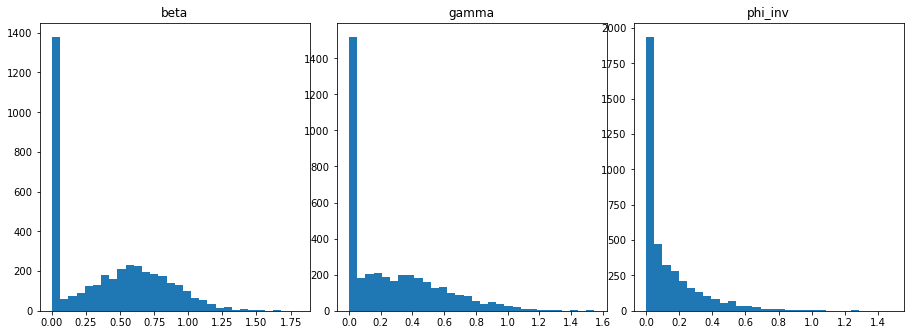

In [95]:
bin =30

fig,axs = plt.subplots(1,3,figsize=(15,5))
axs[0].hist(sim1.stan_variable('beta') ,bins = bin)
axs[0].set_title("beta")
axs[1].hist(sim1.stan_variable('gamma'),bins = bin)
axs[1].set_title("gamma")
axs[2].hist(sim1.stan_variable('phi_inv'), bins = bin)
axs[2].set_title("phi_inv")
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)


Simulated parameters are concentrated. They are limited to zero (<lower=0>), because for our SIR equations, negative values of beta and gamma doesn't make sense

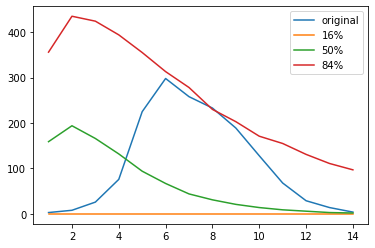

In [96]:
med_prob_ppc1 = np.percentile(sim1.stan_variable('cases'),[5,16,50,84,95],axis=0)
plt.plot(t,in_bed)
plt.plot(t,med_prob_ppc1[1])
plt.plot(t,med_prob_ppc1[2])
plt.plot(t,med_prob_ppc1[3])
labels= ["original", "16%", "50%", "84%"]
plt.legend(labels)
plt.show()

The actual data is within one standard deviation from simulated parameters, so it represents the data well

## Posterior (Model 1)


In [97]:
model_fit1 = CmdStanModel(stan_file='simplified.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [98]:
fit1=model_fit1.sample(data = {'n_days':n_days, 'y0':y0, 't0':t0, 'ts':ts, 'N':N,'cases':in_bed}, 
                            iter_sampling = 4000,
                            iter_warmup= 500,
                            chains = 4,
                            seed = 0,
                            )

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Iteration:    1 / 4500 [  0%]  (Warmup)

chain 1 |███████▏  | 00:16 Iteration: 3100 / 4500 [ 68%]  (Sampling)
chain 1 |███████▍  | 00:17 Iteration: 3200 / 4500 [ 71%]  (Sampling)


chain 1 |███████▋  | 00:18 Iteration: 3300 / 4500 [ 73%]  (Sampling)


chain 1 |███████▊  | 00:18 Iteration: 3400 / 4500 [ 75%]  (Sampling)


chain 1 |████████  | 00:19 Iteration: 3500 / 4500 [ 77%]  (Sampling)




chain 1 |████████▎ | 00:19 Iteration: 3600 / 4500 [ 80%]  (Sampling)


chain 1 |████████▌ | 00:20 Iteration: 3700 / 4500 [ 82%]  (Sampling)


chain 1 |████████▋ | 00:20 Iteration: 3800 / 4500 [ 84%]  (Sampling)


chain 1 |████████▉ | 00:21 Iteration: 3900 / 4500 [ 86%]  (Sampling)


chain 1 |█████████▏| 00:21 Iteration: 4000 / 4500 [ 88%]  (Sampling)




chain 1 |█████████▎| 00:22 Iteration: 4100 / 4500 [ 91%]  (Sampling)


chain 1 |█████████▌| 00:23 Iteration: 4200 / 4500 [ 93%]  (Sampling)


ch


INFO:cmdstanpy:CmdStan done processing.


Initially, there was an issue with sampling, due to wrong arguments provided (Fixed parameters=true), but the issue was fixed by removing it

In [99]:
fit1.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-88.00,0.0200,1.300,-91.000,-88.00,-87.00,4300.0,55.0,1.0
gamma,0.36,0.0014,0.092,0.220,0.35,0.52,4700.0,60.0,1.0
beta,0.31,0.0030,0.190,0.074,0.27,0.70,4100.0,53.0,1.0
phi_inv,0.92,0.0026,0.240,0.580,0.89,1.30,8500.0,110.0,1.0
"y[1,1]",568.00,1.6000,100.000,377.000,583.00,708.00,4111.0,53.0,1.0
...,...,...,...,...,...,...,...,...,...
"y_hat[13,2]",228.00,2.5000,264.000,11.000,141.00,739.00,10872.0,140.0,1.0
"y_hat[13,3]",239.00,2.4000,266.000,12.000,154.00,759.00,12346.0,159.0,1.0
"y_hat[14,1]",162.00,1.9000,201.000,6.000,96.00,537.00,11049.0,142.0,1.0


values of R_hat are close to one, indicating the 4 Markov chains are in close agreement with one another and N_Eff is large, which means the Markov chains were able to explore the parameters space

In [100]:
az.summary(fit1,var_names=['beta','gamma','pred_cases'],kind='stats')

,mean,sd,hdi_3%,hdi_97%
beta,0.311,0.194,0.035,0.685
gamma,0.360,0.092,0.198,0.545
pred_cases[0],162.569,198.660,0.000,505.000
pred_cases[1],220.584,255.467,0.000,661.000
pred_cases[2],234.632,262.491,0.000,693.000
pred_cases[3],225.959,245.986,0.000,661.000
pred_cases[4],199.766,207.804,0.000,564.000
pred_cases[5],172.948,178.670,0.000,485.000
pred_cases[6],149.009,154.861,0.000,420.000
pred_cases[7],125.270,128.927,0.000,345.000


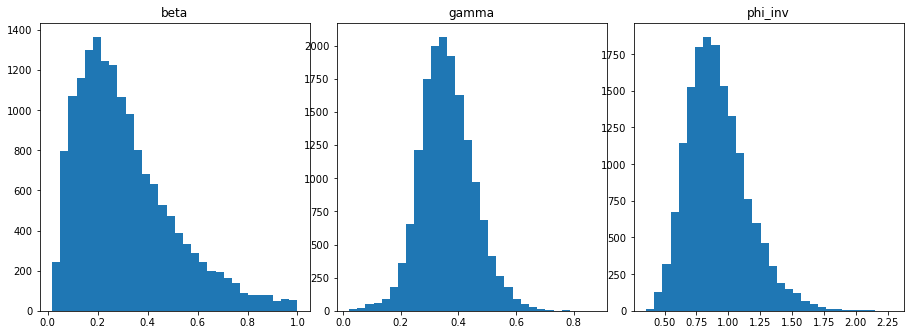

In [101]:
bin =30

fig,axs = plt.subplots(1,3,figsize=(15,5))
axs[0].hist(fit1.stan_variable('beta') ,bins = bin)
axs[0].set_title("beta")
axs[1].hist(fit1.stan_variable('gamma'),bins = bin)
axs[1].set_title("gamma")
axs[2].hist(fit1.stan_variable('phi_inv'), bins = bin)
axs[2].set_title("phi_inv")
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)


histograms of the parameters show that they are concentrated and distrubuted accordingly to defined distributions

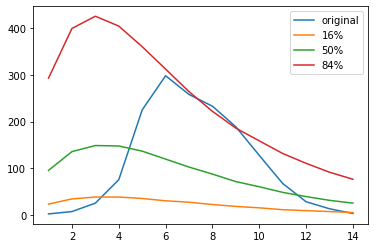

In [102]:
med_prob_ppc = np.percentile(fit1.stan_variable('pred_cases'),[5,16,50,84,95],axis=0)
plt.plot(t,in_bed)
plt.plot(t,med_prob_ppc[1])
plt.plot(t,med_prob_ppc[2])
plt.plot(t,med_prob_ppc[3])


labels= ["original", "16%", "50%", "84%"]
plt.legend(labels)

plt.show()

Adding data to the simplified SIR prior made it perform better, actual data is still within one standard deviation and now the samples are closer to actual data

## Prior (Model 2)

Prior parameters were selected based on experience from preevious case and with trials and errors method

In [103]:
model2 = CmdStanModel(stan_file='file1_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [104]:
sim2 = model2.sample( data = {'n_days':n_days, 'y0':y0, 't0':t0, 'ts':ts, 'N':N}, 
                        iter_sampling = 4000,
                        iter_warmup= 500,
                        fixed_param= True,
                            chains = 4,
                            seed = 0,
                            # output_dir='test'
                            )

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▏         | 00:00 Status



chain 1 |▍         | 00:00 Iteration:    1 / 4000 [  0%]  (Sampling)

chain 1 |▊         | 00:00 Iteration:  200 / 4000 [  5%]  (Sampling)




chain 1 |█▎        | 00:01 Iteration:  400 / 4000 [ 10%]  (Sampling)






























chain 1 |██▏       | 00:05 Iteration:  800 / 4000 [ 20%]  (Sampling)



chain 1 |██▎       | 00:07 Iteration:  900 / 4000 [ 22%]  (Sampling)

chain 1 |██▊       | 00:17 Iteration: 1100 / 4000 [ 27%]  (Sampling)




chain 1 |███▏      | 00:23 Iteration: 1300 / 4000 [ 32%]  (Sampling)







chain 1 |███▍      | 00:29 Iteration: 1400 / 4000 [ 35%]  (Sampling)





chain 1 |███▌      | 00:30 Iteration: 1500 / 4000 [ 37%]  (Sampling)

chain 1 |███▊      | 00:30 Iteration: 1600 / 4000 [ 40%]  (Sampling)

chain 1 |████▎     | 00:31 Iteration: 1800 / 4000 [ 45%]  (Sampling)

chain 1 |████▋     | 00:31 Iteration: 2000 / 4000 [ 50%]  (Sampling)




INFO:cmdstanpy:CmdStan done processing.


In [105]:
sim2.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.00,NaN,0.00,0.0,0.000,0.00,NaN,NaN,NaN
beta,1.60,0.0093,1.20,0.0,1.700,3.50,16000.0,75.0,1.0
gamma,0.45,0.0034,0.41,0.0,0.390,1.20,15000.0,68.0,1.0
phi_inv,0.15,0.0015,0.19,0.0,0.088,0.55,16000.0,74.0,1.0
"y[1,1]",585.00,2.5000,315.00,0.0,755.000,761.00,16229.0,74.0,1.0
"y[1,2]",5.50,0.0670,8.60,0.0,2.800,20.00,16288.0,74.0,1.0
"y[1,3]",1.10,0.0100,1.30,0.0,0.840,3.40,16112.0,74.0,1.0
"y[2,1]",536.00,2.4000,306.00,0.0,716.000,761.00,16082.0,74.0,1.0
"y[2,2]",46.00,0.7100,91.00,0.0,8.000,237.00,16302.0,75.0,1.0


In [106]:
az.summary(sim2,var_names=['beta','gamma','cases'],kind='stats')

,mean,sd,hdi_3%,hdi_97%
beta,1.590,1.186,0.0,3.411
gamma,0.453,0.414,0.0,1.179
cases[0],5.503,10.055,0.0,19.000
cases[1],45.863,100.308,0.0,207.000
cases[2],116.840,191.096,0.0,488.000
cases[3],158.568,222.873,0.0,572.000
cases[4],161.696,217.271,0.0,563.000
cases[5],150.961,213.563,0.0,535.000
cases[6],134.443,195.392,0.0,501.000
cases[7],118.459,187.560,0.0,468.000


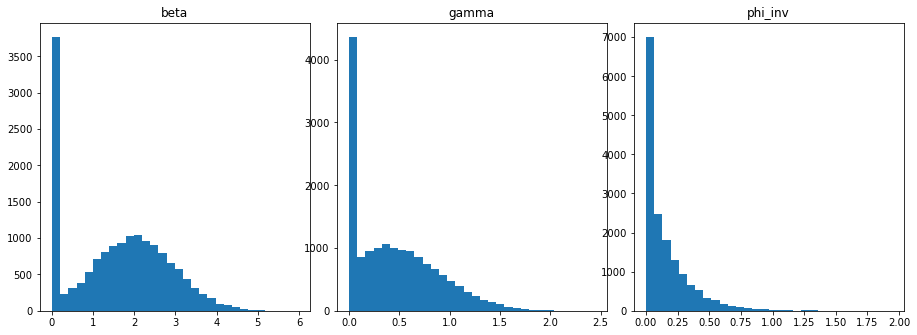

In [107]:
bin =30

fig,axs = plt.subplots(1,3,figsize=(15,5))
axs[0].hist(sim2.stan_variable('beta') ,bins = bin)
axs[0].set_title('beta')
axs[1].hist(sim2.stan_variable('gamma'),bins = bin)
axs[1].set_title('gamma')
axs[2].hist(sim2.stan_variable('phi_inv'), bins = bin)
axs[2].set_title('phi_inv')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)


in the second prior, there is again peak at 0, due to costrain at parameters

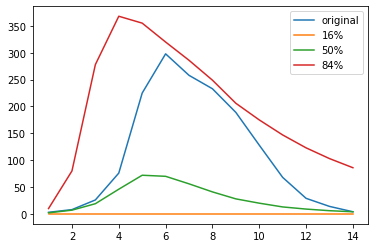

In [108]:
med_prob_ppc = np.percentile(sim2.stan_variable('cases'),[5,16,50,84,95],axis=0)
plt.plot(t,in_bed)
plt.plot(t,med_prob_ppc[1])
plt.plot(t,med_prob_ppc[2])
plt.plot(t,med_prob_ppc[3])


labels= ["original", "16%", "50%", "84%"]
plt.legend(labels)

plt.show()


Here, with additional information about the percentage of infected population, the results of simulation are much more accurate to real data

## Posterior (Model 2)

In [109]:
model_fit2 = CmdStanModel(stan_file='file1.stan')

INFO:cmdstanpy:compiling stan file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/New/file1.stan to exe file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/New/file1
INFO:cmdstanpy:compiled model executable: /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/New/file1
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/New/file1.hpp /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/New/file1.stan
Warning in '/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/New/file1.stan', line 2, column 2: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/New/file1.stan', line 2, column 21: Declaration
    of arrays by placing brackets after a type is deprecated and will 

In [110]:
fit2=model_fit2.sample(data = {'n_days':n_days, 'y0':y0, 't0':t0, 'ts':ts, 'N':N,'cases':in_bed}, 
                            iter_sampling = 4000,
                            iter_warmup= 500,
                            chains = 4,
                            seed = 0,
                            )

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▏         | 00:17 Status
chain 1 |▍         | 00:19 Iteration:    1 / 4500 [  0%]  (Warmup)
chain 1 |▊         | 00:21 Iteration:  200 / 4500 [  4%]  (Warmup)
chain 1 |█         | 00:21 Iteration:  300 / 4500 [  6%]  (Warmup)
chain 1 |█▎        | 00:22 Iteration:  400 / 4500 [  8%]  (Warmup)
chain 1 |█▋        | 00:22 Iteration:  501 / 4500 [ 11%]  (Sampling)
chain 1 |█▉        | 00:23 Iteration:  600 / 4500 [ 13%]  (Sampling)
chain 1 |██▏       | 00:24 Iteration:  700 / 4500 [ 15%]  (Sampling)
chain 1 |██▎       | 00:24 Iteration:  800 / 4500 [ 17%]  (Sampling)
chain 1 |██▌       | 00:25 Iteration:  900 / 4500 [ 20%]  (Sampling)
chain 1 |██▊       | 00:26 Iteration: 1000 / 4500 [ 22%]  (Sampling)
chain 1 |██▉       | 00:27 Iteration: 1100 / 4500 [ 24%]  (Sampling)
chain 1 |███▏      | 00:27 Iteration: 1200 / 4500 [ 26%]  (Sampling)
chain 1 |███▍      | 00:28 Iteration: 1300 / 4500 [ 28%]  (Sampling


INFO:cmdstanpy:CmdStan done processing.


There were no issues with the sampling for this model

In [111]:
az.summary(fit2,var_names=['beta','gamma','pred_cases'],kind='stats')

,mean,sd,hdi_3%,hdi_97%
beta,1.735,0.053,1.641,1.837
gamma,0.542,0.045,0.459,0.626
pred_cases[0],3.304,2.225,0.000,7.000
pred_cases[1],10.669,5.392,2.000,20.000
pred_cases[2],33.413,15.603,8.000,60.000
pred_cases[3],90.130,40.550,24.000,162.000
pred_cases[4],181.636,77.392,50.000,319.000
pred_cases[5],242.685,94.955,77.000,418.000
pred_cases[6],230.721,89.074,74.000,393.000
pred_cases[7],181.168,70.004,55.000,308.000


in the second model, we can see that values of pred_cases rises much slower, due to additional parameter, thus better describing the actual data

In [112]:
fit2.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-65.00,0.01800,1.300,-68.000,-65.00,-64.00,5500.0,56.0,1.0
gamma,0.54,0.00045,0.045,0.470,0.54,0.62,9900.0,100.0,1.0
beta,1.70,0.00056,0.053,1.700,1.70,1.80,8900.0,90.0,1.0
phi_inv,0.14,0.00085,0.075,0.051,0.12,0.28,7800.0,79.0,1.0
"y[1,1]",759.00,0.00230,0.220,758.000,759.00,759.00,8485.0,86.0,1.0
...,...,...,...,...,...,...,...,...,...
"y_hat[13,2]",11.00,0.04400,5.300,3.000,10.00,20.00,14417.0,146.0,1.0
"y_hat[13,3]",33.00,0.14000,15.000,13.000,31.00,61.00,12861.0,130.0,1.0
"y_hat[14,1]",3.30,0.01700,2.200,0.000,3.00,7.00,16222.0,165.0,1.0


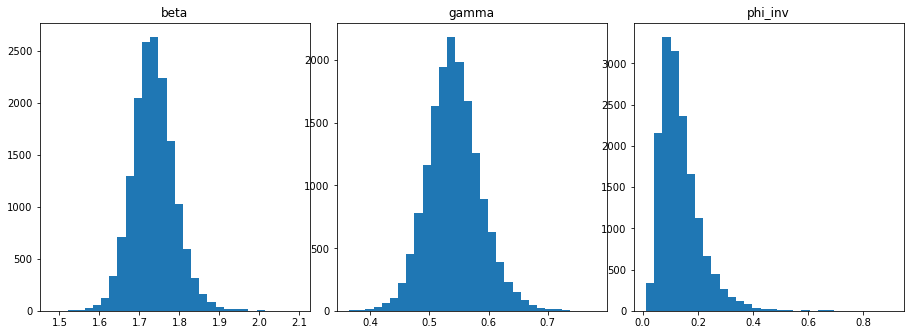

In [113]:
bin =30

fig,axs = plt.subplots(1,3,figsize=(15,5))
axs[0].hist(fit2.stan_variable('beta') ,bins = bin)
axs[0].set_title('beta')
axs[1].hist(fit2.stan_variable('gamma'),bins = bin)
axs[1].set_title('gamma')
axs[2].hist(fit2.stan_variable('phi_inv'), bins = bin)
axs[2].set_title('phi_inv')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)


histograms of parameters are concentrated and the values of R_hat and N_eff from summary table are good

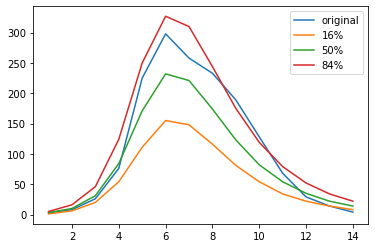

In [114]:
med_prob_ppc = np.percentile(fit2.stan_variable('pred_cases'),[5,16,50,84,95],axis=0)
plt.plot(t,in_bed)
plt.plot(t,med_prob_ppc[1])
plt.plot(t,med_prob_ppc[2])
plt.plot(t,med_prob_ppc[3])


labels= ["original", "16%", "50%", "84%"]
plt.legend(labels)

plt.show()

Here, the samples model the actual data very accurately. The data is close to the mean value of the samples and the standard deviation is small

## Comparison (Model 1 & Model 2)

In [115]:
fit_1=az.from_cmdstanpy(posterior=fit1, posterior_predictive='pred_cases',log_likelihood='log_lik')
fit_2=az.from_cmdstanpy(posterior=fit2, posterior_predictive='pred_cases',log_likelihood='log_lik')

In [116]:
loo_compare = az.compare({'simplified':fit_1,'full':fit_2}, 'loo')
loo_compare

/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:927: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:927: Run

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
simplified,0,-1714.712293,630.772375,0.000000,1.0,157.809050,0.000000,True,log
full,1,-13388.162711,11572.872584,11673.450418,0.0,2491.755245,2334.717508,True,log


In [117]:
waic_compare = az.compare({'simplified':fit_1,'full':fit_2}, 'waic')
waic_compare

/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and w

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
simplified,0,-1940.004087,856.064168,0.000000,1.0,247.438582,0.000000,True,log
full,1,-256589.307819,254774.017692,254649.303732,0.0,88057.533047,87815.243242,True,log


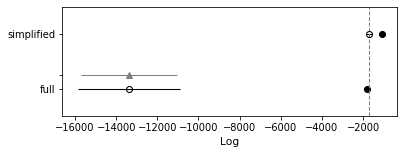

In [118]:
az.plot_compare(loo_compare)
plt.show()

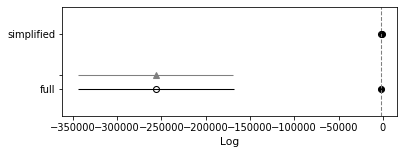

In [119]:
az.plot_compare(waic_compare)
plt.show()

The model comparison shows that the better model is the simplified version, however both waic and loo comparisons produced some warnings

waic and loo comparison also shows the same result as the model comparison, however there are also some warnings